# Objective is to analyze reviews of bank customers and classify review as positive or negative.

**importing libraries**

In [170]:
import pandas as pd
import numpy as np

# importing natural language toolkit:ntlk & dictionary of useless words:stopwords
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

**importing bank reviews dataset**

In [210]:
df = pd.read_excel("D:/PYTHON VIDEOS AND PRACTICE/PYTHON DOCS/Bootcamp materials/3. Case Studies & Final Projects/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx")

In [211]:
df

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


**removing date & bankname column** as it has no relation with the objective.

In [212]:
df.drop(['Date','BankName'], axis=1,inplace =True)

In [213]:
df['Reviews'] = df['Reviews'].map(lambda x: x.lstrip('\r\n').rstrip('\r\n'))

Converting stars column to binary form. Now, **0:positive review** & **1:negative review**

In [216]:
df = df.replace(5,0)

In [217]:
df

,Stars,Reviews
0,0,"Great job, Wyndham Capital! Each person was pr..."
1,0,Matthew Richardson is professional and helpful...
2,0,We had a past experience with Wyndham Mortgage...
3,0,We have been dealing with Brad Thomka from the...
4,0,I can't express how grateful I am for the supp...
...,...,...
500,1,I never write reviews but had to this time to ...
501,1,It all started when Bob G ran a credit check w...
502,1,What a horrible experience. We have excellent ...
503,1,"Rep was extremely professional, friendly, and ..."


In [218]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [219]:
# return the wordnet object value corresponding to the Parts of Speech tag.
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["Reviews_Clean"] = df["Reviews"].apply(lambda x: clean_text(x))

In [220]:
# nltk.download('vader_lexicon')

In [221]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Reviews"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [222]:
df

,Stars,Reviews,Reviews_Clean,neg,neu,pos,compound
0,0,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital person professional ...,0.000,0.703,0.297,0.8011
1,0,Matthew Richardson is professional and helpful...,matthew richardson professional helpful help f...,0.000,0.703,0.297,0.8516
2,0,We had a past experience with Wyndham Mortgage...,past experience wyndham mortgage would without...,0.000,0.794,0.206,0.9595
3,0,We have been dealing with Brad Thomka from the...,deal brad thomka beginning start stressful tim...,0.018,0.756,0.226,0.9818
4,0,I can't express how grateful I am for the supp...,can't express grateful support zach provide fa...,0.040,0.861,0.099,0.5569
...,...,...,...,...,...,...,...
500,1,I never write reviews but had to this time to ...,never write review time prevent anyone make mi...,0.086,0.800,0.114,0.9350
501,1,It all started when Bob G ran a credit check w...,start bob run credit check without knowledge c...,0.014,0.943,0.043,0.5293
502,1,What a horrible experience. We have excellent ...,horrible experience excellent credit plenty in...,0.161,0.722,0.117,-0.7882
503,1,"Rep was extremely professional, friendly, and ...",rep extremely professional friendly helpful fi...,0.013,0.849,0.138,0.9785


In [223]:
# add number of characters column
df["nb_chars"] = df["Reviews"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["Reviews"].apply(lambda x: len(x.split(" ")))

In [155]:
# pip install gensim

In [224]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Reviews_Clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Reviews_Clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [225]:
df

,Stars,Reviews,Reviews_Clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital person professional ...,0.000,0.703,0.297,0.8011,126,19,-0.012463,0.064392,-0.028571,-0.141446,-0.059639
1,0,Matthew Richardson is professional and helpful...,matthew richardson professional helpful help f...,0.000,0.703,0.297,0.8516,159,25,-0.161584,0.030610,-0.084636,-0.253127,0.044449
2,0,We had a past experience with Wyndham Mortgage...,past experience wyndham mortgage would without...,0.000,0.794,0.206,0.9595,462,79,-0.504183,0.093290,-0.023247,-0.774793,-0.141568
3,0,We have been dealing with Brad Thomka from the...,deal brad thomka beginning start stressful tim...,0.018,0.756,0.226,0.9818,605,107,-0.451416,0.022510,0.049664,-0.907004,-0.250403
4,0,I can't express how grateful I am for the supp...,can't express grateful support zach provide fa...,0.040,0.861,0.099,0.5569,341,59,-0.206496,0.130527,-0.090291,-0.520622,-0.183866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,I never write reviews but had to this time to ...,never write review time prevent anyone make mi...,0.086,0.800,0.114,0.9350,2456,463,-1.609631,0.313116,0.001711,-3.019903,-0.564020
501,1,It all started when Bob G ran a credit check w...,start bob run credit check without knowledge c...,0.014,0.943,0.043,0.5293,826,172,-0.666747,0.025572,-0.106477,-1.252436,-0.287797
502,1,What a horrible experience. We have excellent ...,horrible experience excellent credit plenty in...,0.161,0.722,0.117,-0.7882,750,143,-0.515003,0.038427,0.024578,-0.985929,-0.100434
503,1,"Rep was extremely professional, friendly, and ...",rep extremely professional friendly helpful fi...,0.013,0.849,0.138,0.9785,1098,219,-0.933182,0.219325,-0.078646,-1.650472,-0.223661


In [226]:

# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Reviews_Clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

### Exploratory Data Analysis

In [227]:
df

,Stars,Reviews,Reviews_Clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_whole,word_wife,word_within,word_without,word_wonderful,word_word,word_work,word_would,word_write,word_year
0,0,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital person professional ...,0.000,0.703,0.297,0.8011,126,19,-0.012463,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,Matthew Richardson is professional and helpful...,matthew richardson professional helpful help f...,0.000,0.703,0.297,0.8516,159,25,-0.161584,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,We had a past experience with Wyndham Mortgage...,past experience wyndham mortgage would without...,0.000,0.794,0.206,0.9595,462,79,-0.504183,...,0.0,0.000000,0.0,0.201191,0.0,0.000000,0.000000,0.222674,0.000000,0.000000
3,0,We have been dealing with Brad Thomka from the...,deal brad thomka beginning start stressful tim...,0.018,0.756,0.226,0.9818,605,107,-0.451416,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.104806,0.000000,0.000000
4,0,I can't express how grateful I am for the supp...,can't express grateful support zach provide fa...,0.040,0.861,0.099,0.5569,341,59,-0.206496,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.107781,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,I never write reviews but had to this time to ...,never write review time prevent anyone make mi...,0.086,0.800,0.114,0.9350,2456,463,-1.609631,...,0.0,0.000000,0.0,0.183267,0.0,0.072991,0.027938,0.169031,0.072991,0.102046
501,1,It all started when Bob G ran a credit check w...,start bob run credit check without knowledge c...,0.014,0.943,0.043,0.5293,826,172,-0.666747,...,0.0,0.129273,0.0,0.125399,0.0,0.000000,0.000000,0.000000,0.000000,0.104736
502,1,What a horrible experience. We have excellent ...,horrible experience excellent credit plenty in...,0.161,0.722,0.117,-0.7882,750,143,-0.515003,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.066165,0.000000,0.000000,0.000000
503,1,"Rep was extremely professional, friendly, and ...",rep extremely professional friendly helpful fi...,0.013,0.849,0.138,0.9785,1098,219,-0.933182,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [228]:
# show is_bad_review distribution
df["Stars"].value_counts(normalize = True)

0    0.811881
1    0.188119
Name: Stars, dtype: float64

In [162]:
# pip install wordcloud

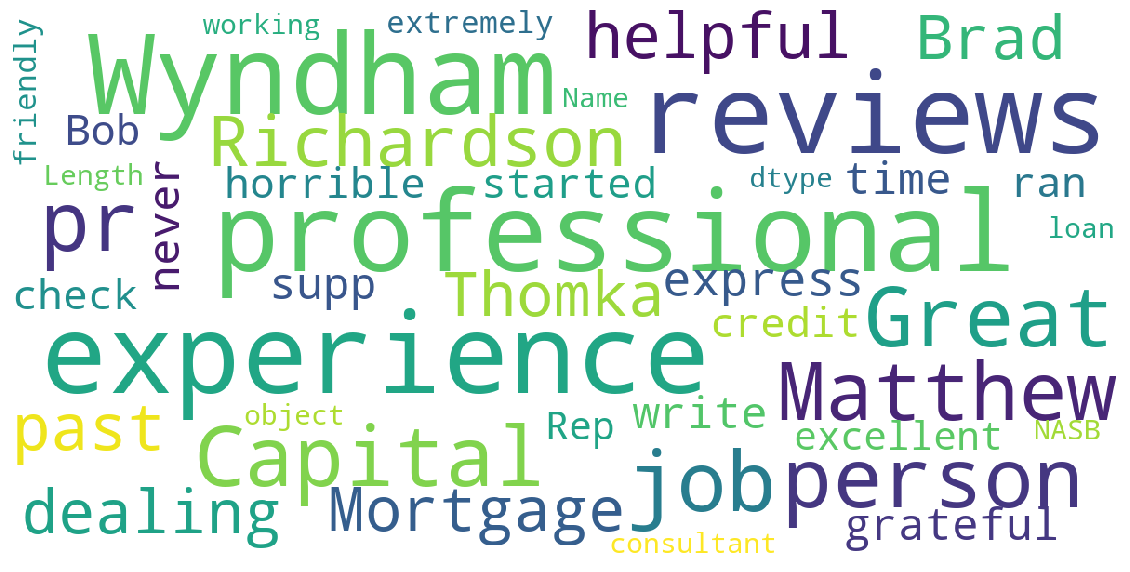

In [229]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Reviews"])

In [164]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos"]].head(10)

,Reviews,pos
144,Friendly and efficient.\r\n,0.857
263,"Great experience, great people!\r\n",0.809
205,Great service and easy\r\n,0.778
467,Great service and easy\r\n,0.778
363,Simply awesome! Responsive and very helpful. \...,0.769
349,"Good service, very helpful people!\r\n",0.677
241,Very helpful and great customer service.\r\n ...,0.651
481,Great bank with great products. Easily the be...,0.649
240,Great customer service and very helpful.\r\n ...,0.643
245,Bob did amazing job. Process was smooth and st...,0.583


In [230]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Reviews", "neg"]].head(10)

,Reviews,neg
401,bad\r\n,1.000
412,Was not able to provide a viable product for m...,0.350
406,Adam and his team apparently do not communicat...,0.347
220,Miserable experience. They screwed up everythi...,0.346
492,Miserable experience. They screwed up everythi...,0.346
40,Miserable experience. They screwed up everythi...,0.346
44,This Lender contacted my previous phone number...,0.271
499,This Lender contacted my previous phone number...,0.271
227,This Lender contacted my previous phone number...,0.271
148,Had slight difficulty with online documents an...,0.255


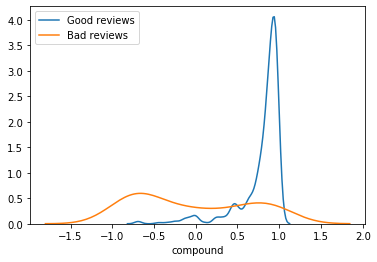

In [231]:

# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df[df['Stars'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [232]:
# feature selection
label = "Stars"
ignore_cols = [label, "Reviews", "Reviews_Clean"]
features = [c for c in df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)


## Random Forest Classifier

In [233]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.098130
0,neg,0.060298
2,pos,0.054975
88,word_credit,0.028488
4,nb_chars,0.026252
1,neu,0.022080
5,nb_words,0.020872
211,word_lock,0.020644
6,doc2vec_vector_0,0.018126
56,word_call,0.015930


## Receiver Operating Charecteristic curve

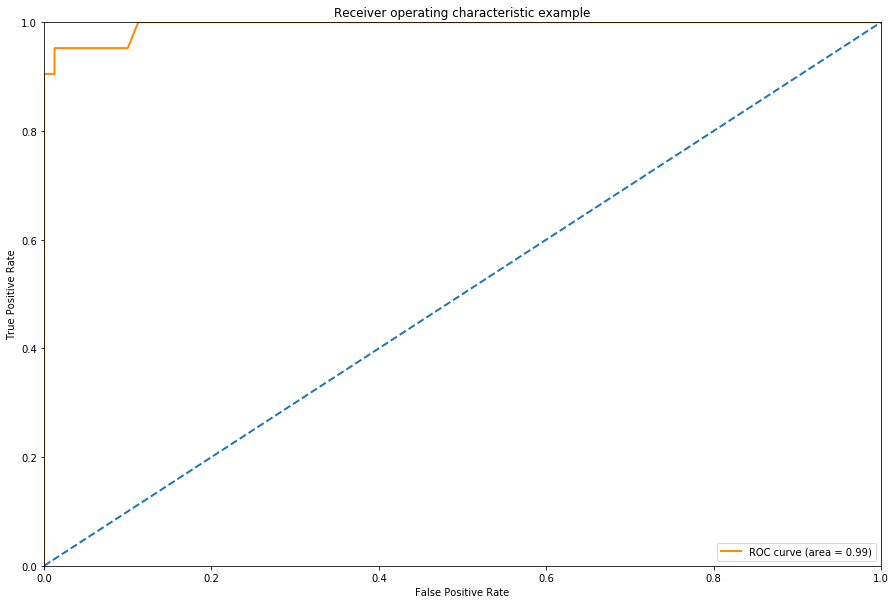

In [234]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# pip install funcsigs

In [235]:
try:
    from inspect import signature
except ImportError:
    from sklearn.externals.funcsigs import signature

### Precision Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

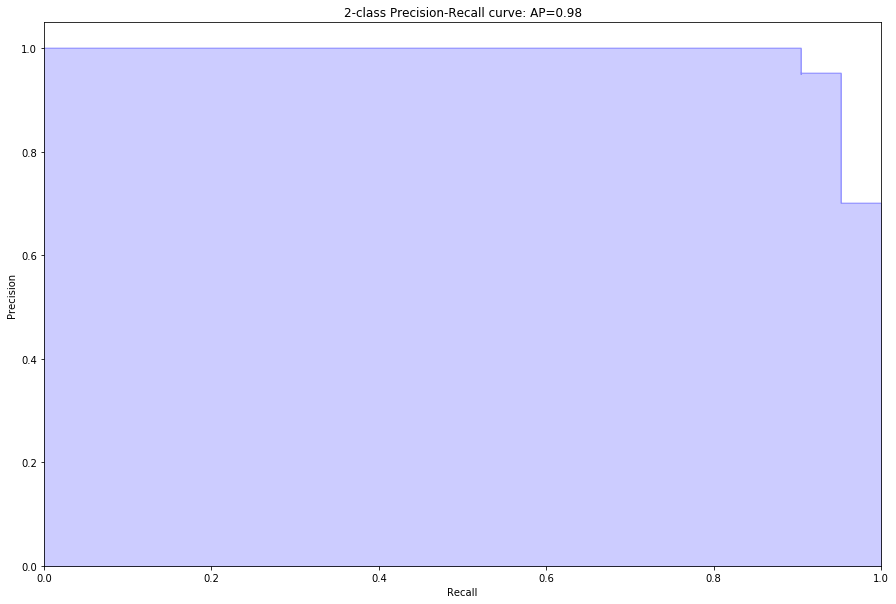

In [236]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))